<a href="https://colab.research.google.com/github/sijuswamy/Test/blob/main/Segmentation_example_with_Yolo%2BSAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segmentation with Yolov7 and Segment Any Model (SAM)

The Segment Anything Model (SAM) propels computer vision forward by simplifying image segmentation, crucial for a range of uses from scientific studies to creative endeavours.

SAM leverages the Segment Anything 1-Billion (SA-1B) mask dataset, the largest to date, to democratize segmentation by reducing the reliance on specialized expertise, heavy computational power, and extensive dataset annotations.

Under the Apache 2.0 license, SAM introduces a foundational model framework, allowing for easy task adaptation via simple prompts, mirroring advancements seen in natural language processing.

With training on over 1 billion diverse masks, SAM understands a generalized notion of objects, facilitating zero-shot transfer across unfamiliar domains and enhancing its utility across various fields, including AR/VR, creative arts, and scientific research.

The model’s prompt-driven flexibility and wide-ranging task adaptability signal a significant leap in segmentation technology, positioning SAM as a versatile and accessible tool for both the research community and application developers.

In [ ]:
!mkdir {HOME}
%cd {HOME}/
!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FU36KILiRdZNG5JWKljp")
project = rf.workspace("roboflow-100").project("construction-safety-gsnvb")
dataset = project.version(2).download("yolov7")

/content/{HOME}
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to construction-safety-2 in yolov7pytorch:: 100%|██████████| 2424/2424 [00:00<00:00, 3563.42it/s]


In [ ]:
# downloading yolo
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip3 install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 325 (delta 145), reused 142 (delta 142), pack-reused 135 (from 1)
Receiving objects: 100% (325/325), 2.23 MiB | 26.92 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/{HOME}/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 

In [ ]:
# save directory path to HOME
import os
HOME = os.getcwd()
print(HOME)

/content/{HOME}/yolov9


In [ ]:
# download yolo model weights for TL
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.6.0+cu124
True


>**Note:** There will be an error due to chk point issues. Modify the line in yolov9/models/experimental.py where the checkpoint is loaded.
Find this line:
```
ckpt = torch.load(attempt_download(w), map_location='cpu', weights_only=False)

```

## Selecting image for segmentation task



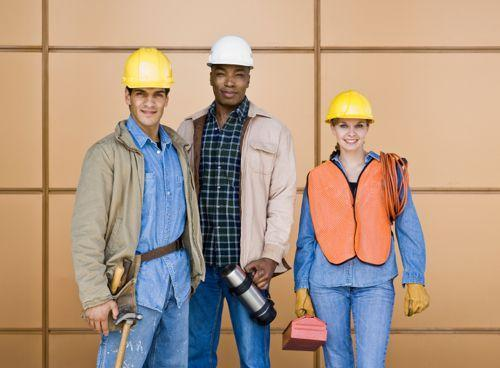

In [ ]:
Image(filename=f"/content/test_image.jpg", width=600)

## Object detection part using Yolov7

In [ ]:
# inference on an image
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source /content/test_image.jpg --device 0 --save-txt --save-conf

detect: weights=['/content/{HOME}/yolov9/weights/gelan-c.pt'], source=/content/test_image.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/test_image.jpg: 480x640 3 persons, 1 bottle, 57.8ms
Speed: 0.5ms pre-process, 57.8ms inference, 158.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp14
1 labels saved to runs/detect/exp14/labels


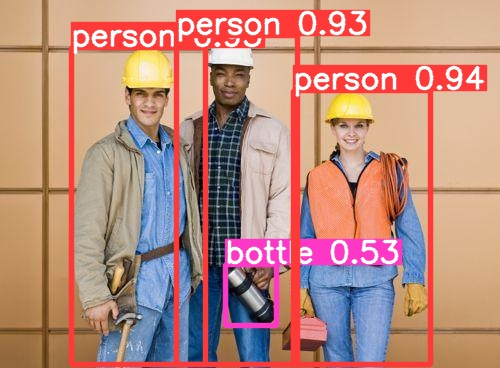

In [ ]:
from IPython.display import Image, display
Image(filename=f"{HOME}/runs/detect/exp14/test_image.jpg", width=600)

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 19.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Install Segment-Anything Model



In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-9x6qo3ls
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-9x6qo3ls
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36592 sha256=8496ca6585211be275d3a7f25b144ab18e30d7a595c44709c98b7cfb5e510938
  Stored in directory: /tmp/pip-ephem-wheel-cache-ytadqzoq/wheels/15/d7/bd/05f5f23b7dcbe70cbc6783b06f12143b0cf1a5da5c7b52dcc5
Successfully built segment_anything
--2025-03-22 04:14:59--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.70, 13.227.219.10, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227

In [ ]:
import cv2

# Specify the path to your image
image_path = '/content/test_image.jpg'

# Read the image to get its dimensions
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

detections_path = '/content/{HOME}/yolov9/runs/detect/exp14/labels/test_image.txt'

bboxes = []
class_ids = []
conf_scores = []

with open(detections_path, 'r') as file:
    for line in file:
        components = line.split()
        class_id = int(components[0])
        confidence = float(components[5])
        cx, cy, w, h = [float(x) for x in components[1:5]]

        # Convert from normalized [0, 1] to image scale
        cx *= image_width
        cy *= image_height
        w *= image_width
        h *= image_height

        # Convert the center x, y, width, and height to xmin, ymin, xmax, ymax
        xmin = cx - w / 2
        ymin = cy - h / 2
        xmax = cx + w / 2
        ymax = cy + h / 2

        class_ids.append(class_id)
        bboxes.append((xmin, ymin, xmax, ymax))
        conf_scores.append(confidence)

# Display the results
for class_id, bbox, conf in zip(class_ids, bboxes, conf_scores):
    print(f'Class ID: {class_id}, Confidence: {conf:.2f}, BBox coordinates: {bbox}')


Class ID: 39, Confidence: 0.53, BBox coordinates: (225.0, 264.000072, 276.0, 325.00012)
Class ID: 0, Confidence: 0.93, BBox coordinates: (71.0, 47.00004000000001, 205.0, 364.000024)
Class ID: 0, Confidence: 0.93, BBox coordinates: (176.0, 35.00011200000003, 297.0, 364.00020800000004)
Class ID: 0, Confidence: 0.94, BBox coordinates: (293.0, 90.00010399999996, 430.0, 364.000024)


In [ ]:
# segmentation setup

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "/content/{HOME}/yolov9/sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

In [ ]:
# image segmentation task starts
import cv2
image = cv2.cvtColor(cv2.imread('/content/test_image.jpg'), cv2.COLOR_BGR2RGB)
predictor.set_image(image)

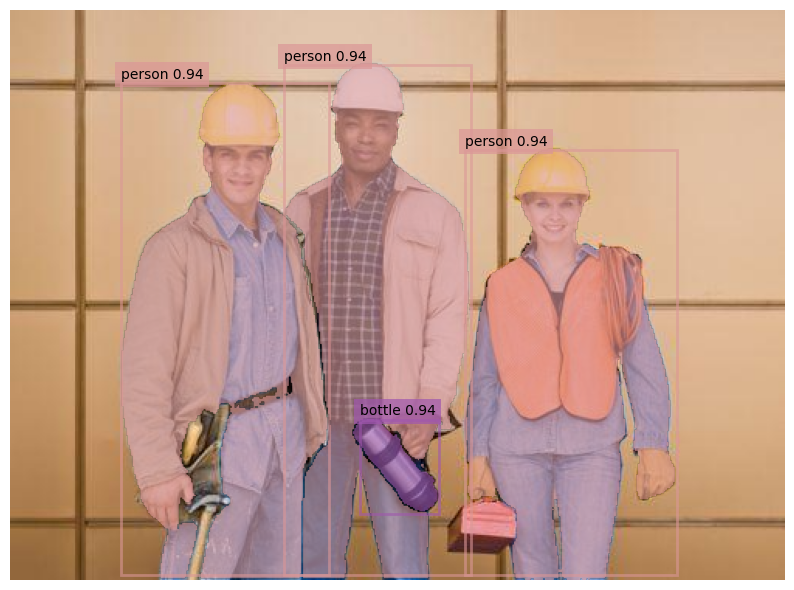

In [ ]:
# visualization
import matplotlib.patches as patches
from matplotlib import pyplot as plt
import numpy as np
import yaml

with open('/content/{HOME}/yolov9/data/coco.yaml', 'r') as file:
    coco_data = yaml.safe_load(file)
    class_names = coco_data['names']

for class_id, bbox, conf in zip(class_ids, bboxes, conf_scores):
    class_name = class_names[class_id]
    # print(f'Class ID: {class_id}, Class Name: {class_name}, BBox coordinates: {bbox}')

color_map = {}
for class_id in class_ids:
    color_map[class_id] = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)

def show_mask(mask, ax, color):
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * np.array(color).reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_box(box, label, conf_score, color, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    rect = plt.Rectangle((x0, y0), w, h, edgecolor=color, facecolor='none', lw=2)
    ax.add_patch(rect)

    label_offset = 10

    # Construct the label with the class name and confidence score
    label_text = f'{label} {conf_score:.2f}'

    ax.text(x0, y0 - label_offset, label_text, color='black', fontsize=10, va='top', ha='left',
            bbox=dict(facecolor=color, alpha=0.7, edgecolor='none', boxstyle='square,pad=0.4'))

plt.figure(figsize=(10, 10))
ax = plt.gca()
plt.imshow(image)

# Display and process each bounding box with the corresponding mask
for class_id, bbox in zip(class_ids, bboxes):
    class_name = class_names[class_id]
    # print(f'Class ID: {class_id}, Class Name: {class_name}, BBox coordinates: {bbox}')

    color = color_map[class_id]
    input_box = np.array(bbox)

    # Generate the mask for the current bounding box
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box,
        multimask_output=False,
    )

    show_mask(masks[0], ax, color=color)
    show_box(bbox, class_name, conf, color, ax)

# Show the final plot
plt.axis('off')
plt.show()

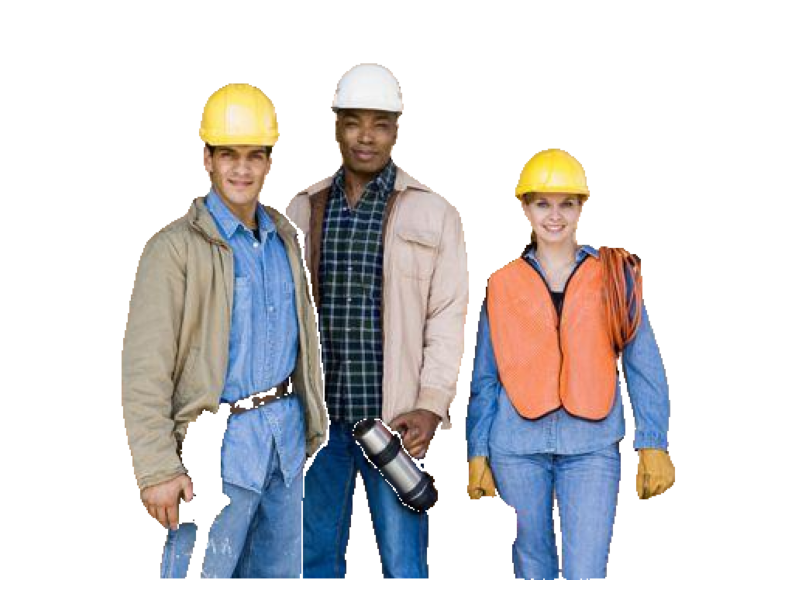

In [ ]:
# extracting the masks
aggregate_mask = np.zeros(image.shape[:2], dtype=np.uint8)

# Generate and accumulate masks for all bounding boxes
for bbox in bboxes:
    input_box = np.array(bbox).reshape(1, 4)
    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box,
        multimask_output=False,
    )
    aggregate_mask = np.where(masks[0] > 0.5, 1, aggregate_mask)

# Convert the aggregate segmentation mask to a binary mask
binary_mask = np.where(aggregate_mask == 1, 1, 0)

# Create a white background with the same size as the image
white_background = np.ones_like(image) * 255

# Apply the binary mask to the original image
# Where the binary mask is 0 (background), use white_background; otherwise, use the original image
new_image = white_background * (1 - binary_mask[..., np.newaxis]) + image * binary_mask[..., np.newaxis]

# Display the new image with the detections and white background
plt.figure(figsize=(10, 10))
plt.imshow(new_image.astype(np.uint8))
plt.axis('off')
plt.show()